In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 4.9 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 5.2 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 5.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 4.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 3.6 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [6]:
# Load dataset
df = pd.read_csv("Employee.csv")


In [7]:
# Data Exploration
print("Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    
print("\nStatistical Summary:")
print(df.describe())

Unique values per column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [14]:
print(df.columns)

Index(['Company', 'age', 'salary', 'Place', 'Country', 'Gender'], dtype='object')


In [15]:
# Renaming columns for clarity
df.rename(columns={'Age': 'age', 'Salary': 'salary', 'Place': 'Location'}, inplace=True)

In [16]:
print(df.columns)

Index(['Company', 'age', 'salary', 'Location', 'Country', 'Gender'], dtype='object')


In [17]:
# Data Cleaning
# Replace 0 in age with NaN
df['age'] = df['age'].replace(0, np.nan)

In [20]:
# Renaming columns for clarity
df.rename(columns={'age': 'Age', 'salary': 'Salary', 'Place': 'Location'}, inplace=True)

In [21]:
print(df.columns)

Index(['Company', 'Age', 'Salary', 'Location', 'Country', 'Gender'], dtype='object')


In [22]:
# Handling missing values (using median for numerical, mode for categorical)
df.fillna({
    'age': df['Age'].median(),
    'salary': df['Salary'].median(),
    'location': df['Location'].mode()[0]
}, inplace=True)


In [23]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [25]:
# Detecting and treating outliers (using IQR method)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


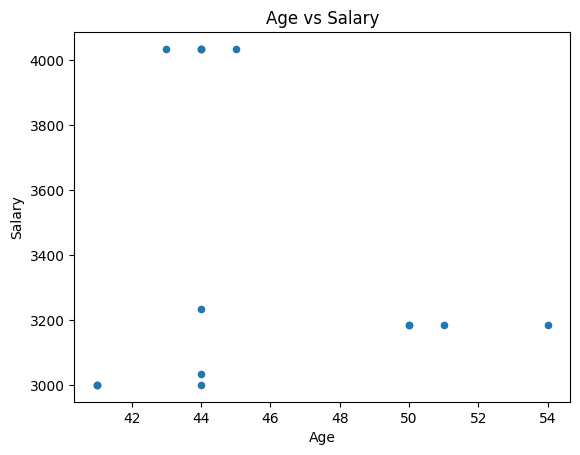

In [27]:
# Data Analysis
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_df.plot(x='Age', y='Salary', kind='scatter')
plt.title('Age vs Salary')
plt.show()

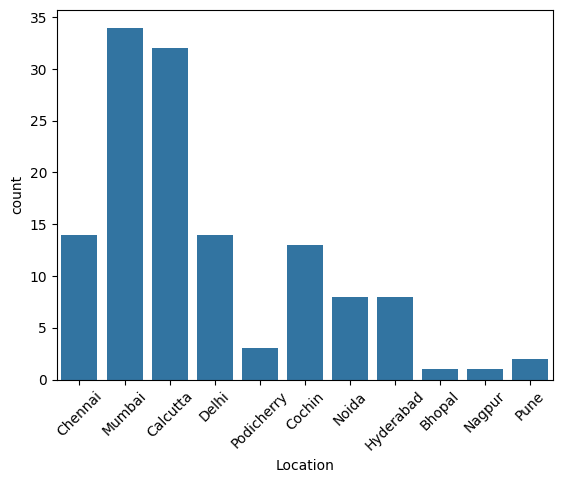

In [28]:
# Count people from each location and visualize
sns.countplot(x=df['Location'])
plt.xticks(rotation=45)
plt.show()

In [29]:
# Data Encoding
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])


In [30]:
df = pd.get_dummies(df, columns=['Location'])

In [31]:
# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [32]:
df[['Age', 'Salary']] = scaler_standard.fit_transform(df[['Age', 'Salary']])
df[['Age', 'Salary']] = scaler_minmax.fit_transform(df[['Age', 'Salary']])

In [33]:
print("Data preprocessing complete.")

Data preprocessing complete.
